In [2]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns, sys
import matplotlib.style as style; style.use('fivethirtyeight')
from scipy.stats import zscore, norm

# Modelling - LR, KNN, NB, Metrics
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, accuracy_score
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

In [4]:
# Reading the data as dataframe and print the first five rows
bank = pd.read_csv(r'G:\datascience\great learning\Bank_Personal_Loan_Modelling.csv')
bank.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [5]:
# Get info of the dataframe columns
bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [6]:
#Dataset has 5000 rows and 14 columns, with no missing values.

# Exploratory data analysis

In [7]:
# Five point summary of numerical attributes
bank.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [8]:
# Checking the distribution of target variable
display(bank['Personal Loan'].value_counts(), bank['Personal Loan'].value_counts(normalize = True)*100)

0    4520
1     480
Name: Personal Loan, dtype: int64

0    90.4
1     9.6
Name: Personal Loan, dtype: float64

In [9]:
# Checking count of negative values in Experience
bank.loc[bank['Experience'] < 0].describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.0,52.000000,52.0,52.000000,52.000000
mean,2427.346154,24.519231,-1.442308,69.942308,93240.961538,2.865385,2.129423,2.076923,43.596154,0.0,0.115385,0.0,0.576923,0.288462
std,1478.834118,1.475159,0.639039,37.955295,1611.654806,0.970725,1.750562,0.836570,90.027068,0.0,0.322603,0.0,0.498867,0.457467
min,90.000000,23.000000,-3.000000,12.000000,90065.000000,1.000000,0.200000,1.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
25%,767.250000,24.000000,-2.000000,40.750000,92167.750000,2.000000,1.000000,1.000000,0.000000,0.0,0.000000,0.0,0.000000,0.000000
50%,2783.500000,24.000000,-1.000000,65.500000,93060.000000,3.000000,1.800000,2.000000,0.000000,0.0,0.000000,0.0,1.000000,0.000000
75%,3669.500000,25.000000,-1.000000,86.750000,94720.000000,4.000000,2.325000,3.000000,0.000000,0.0,0.000000,0.0,1.000000,1.000000
max,4958.000000,29.000000,-1.000000,150.000000,95842.000000,4.000000,7.200000,3.000000,314.000000,0.0,1.000000,0.0,1.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000000BF0A41F828>,
      dtype=object)

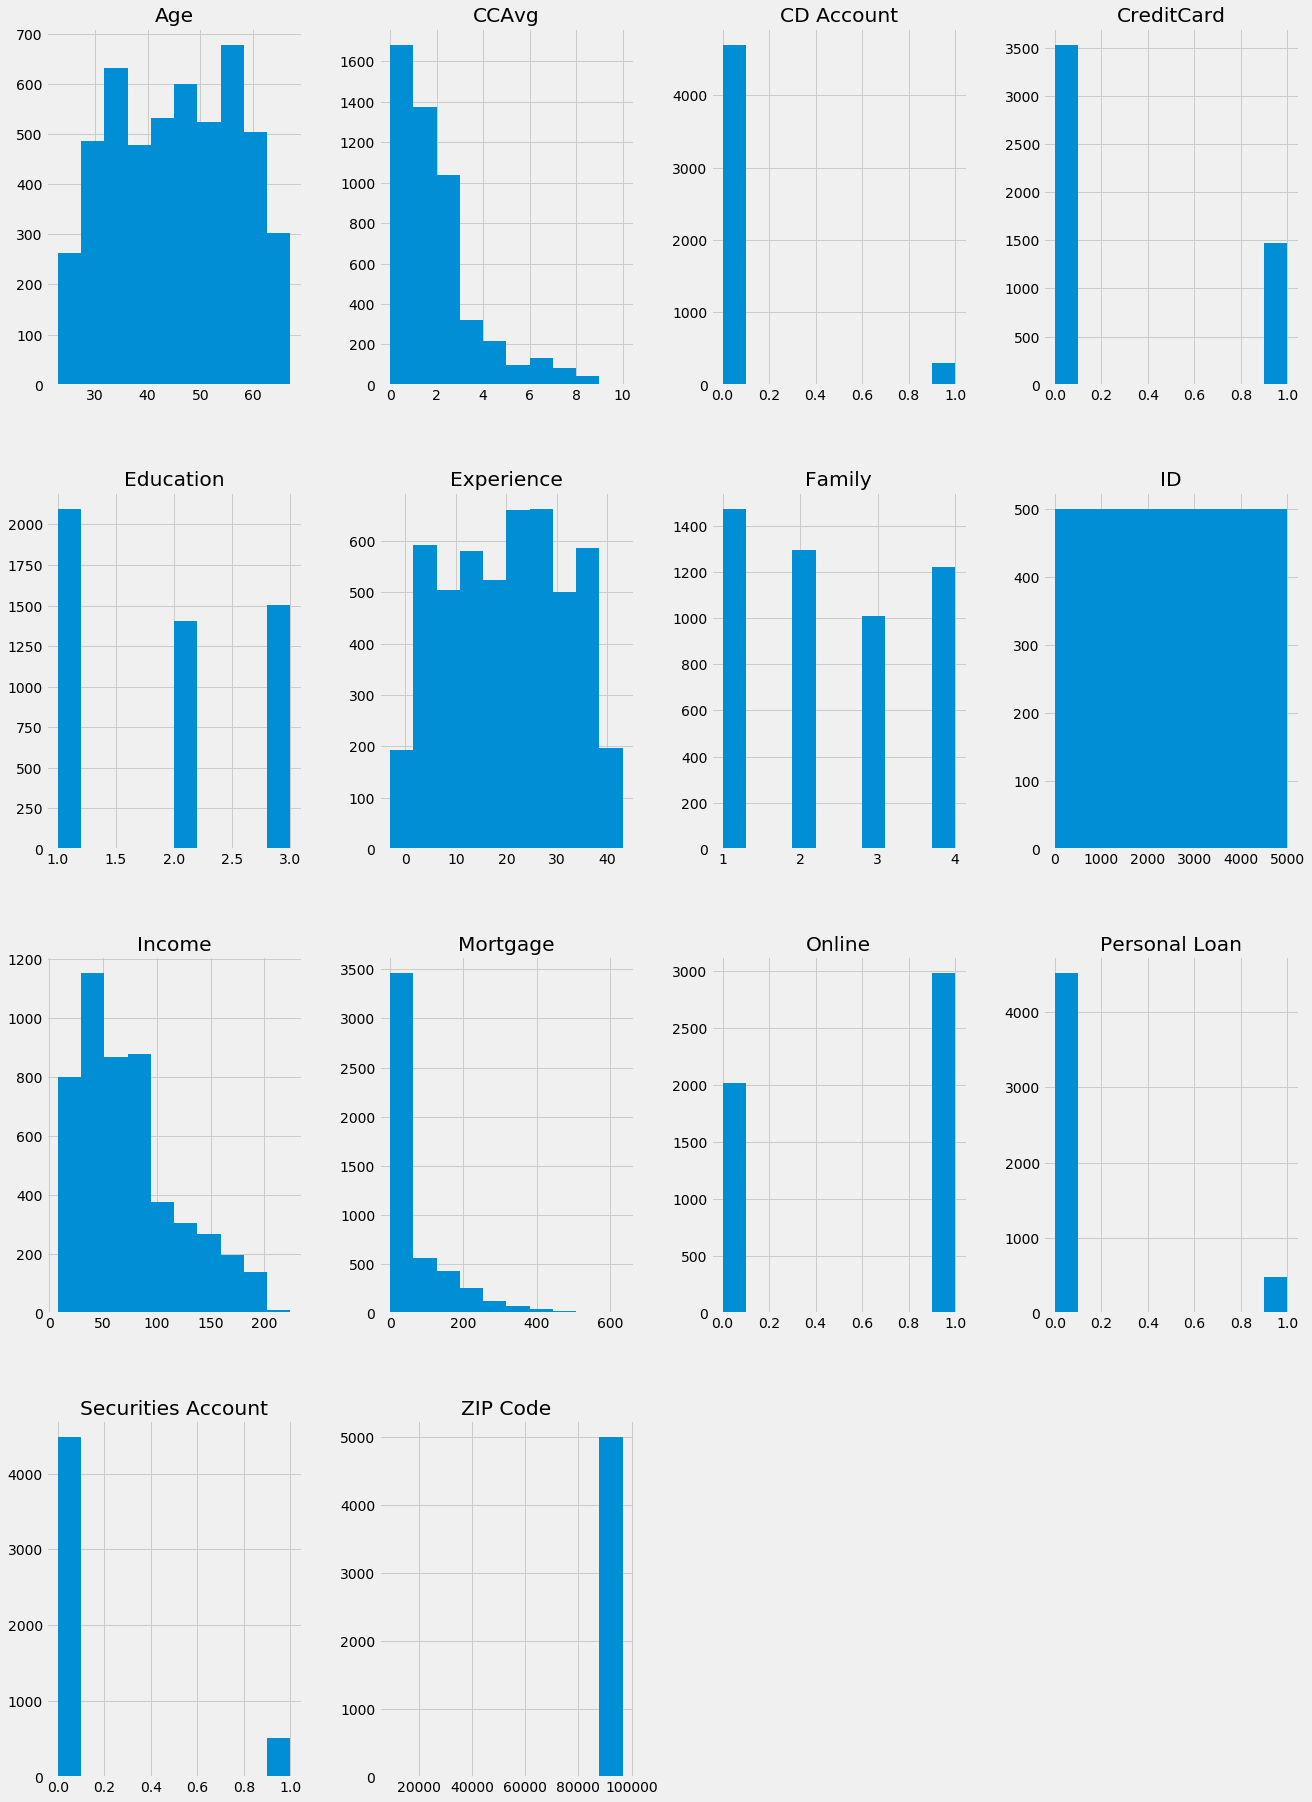

In [10]:
bank.hist(figsize=(20,30))

In [11]:
replace_value = bank.loc[(bank['Age'] > 23) & (bank['Age'] <= 29) & (bank['Income'] > 12) & (bank['Income'] < 150) & 
         (bank['Personal Loan'] == 0) & (bank['CD Account'] == 0), 'Experience'].median()

# replacing the negative values with 2
bank['Experience'] = np.where(bank['Experience'] < 0, replace_value, bank['Experience'])

In [13]:
# Updated five point summary of Experience column
bank['Experience'].describe()

count    5000.000000
mean       20.140400
std        11.405644
min         0.000000
25%        10.000000
50%        20.000000
75%        30.000000
max        43.000000
Name: Experience, dtype: float64

Text(0.5, 1.0, 'Distribution of Mortgage for taking Personal Loan')

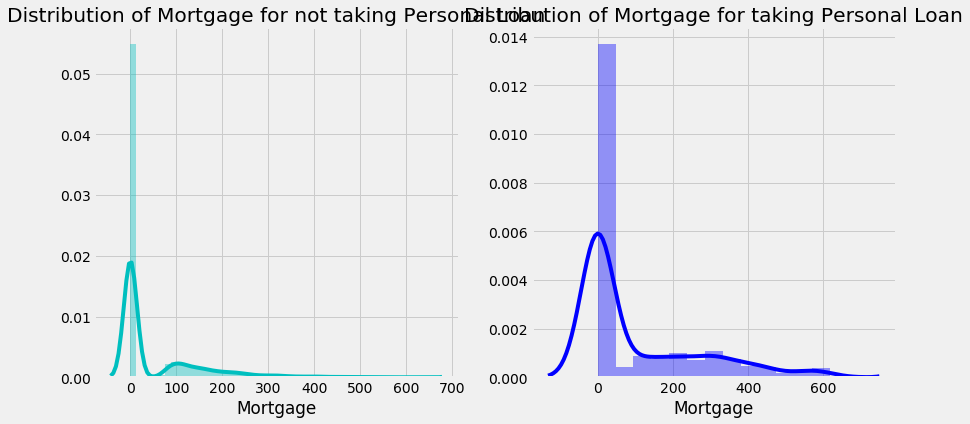

In [14]:
# Distribution of Mortgage
fig = plt.figure(figsize = (12.8, 6))

ax = fig.add_subplot(121)
sns.distplot(bank[(bank['Personal Loan'] == 0)]['Mortgage'], color = 'c', 
             ax = ax).set_title('Distribution of Mortgage for not taking Personal Loan')

ax= fig.add_subplot(122)
sns.distplot(bank[(bank['Personal Loan'] == 1)]['Mortgage'], color = 'b', 
             ax = ax).set_title('Distribution of Mortgage for taking Personal Loan')

Text(0.5, 1.0, 'Distribution of CCAvg for taking Personal Loan')

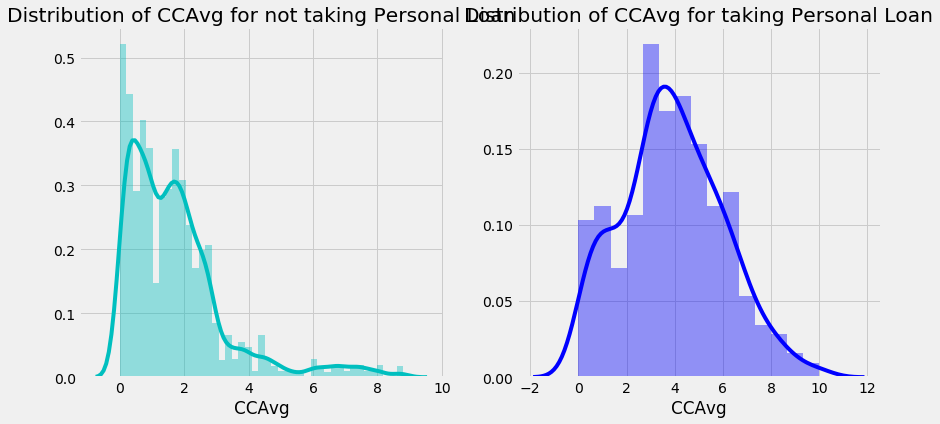

In [15]:
# Distribution of CCAvg
fig = plt.figure(figsize = (12.8, 6))

ax = fig.add_subplot(121)
sns.distplot(bank[(bank['Personal Loan'] == 0)]['CCAvg'], color = 'c', 
             ax = ax).set_title('Distribution of CCAvg for not taking Personal Loan')

ax= fig.add_subplot(122)
sns.distplot(bank[(bank['Personal Loan'] == 1)]['CCAvg'], color = 'b', 
             ax = ax).set_title('Distribution of CCAvg for taking Personal Loan')

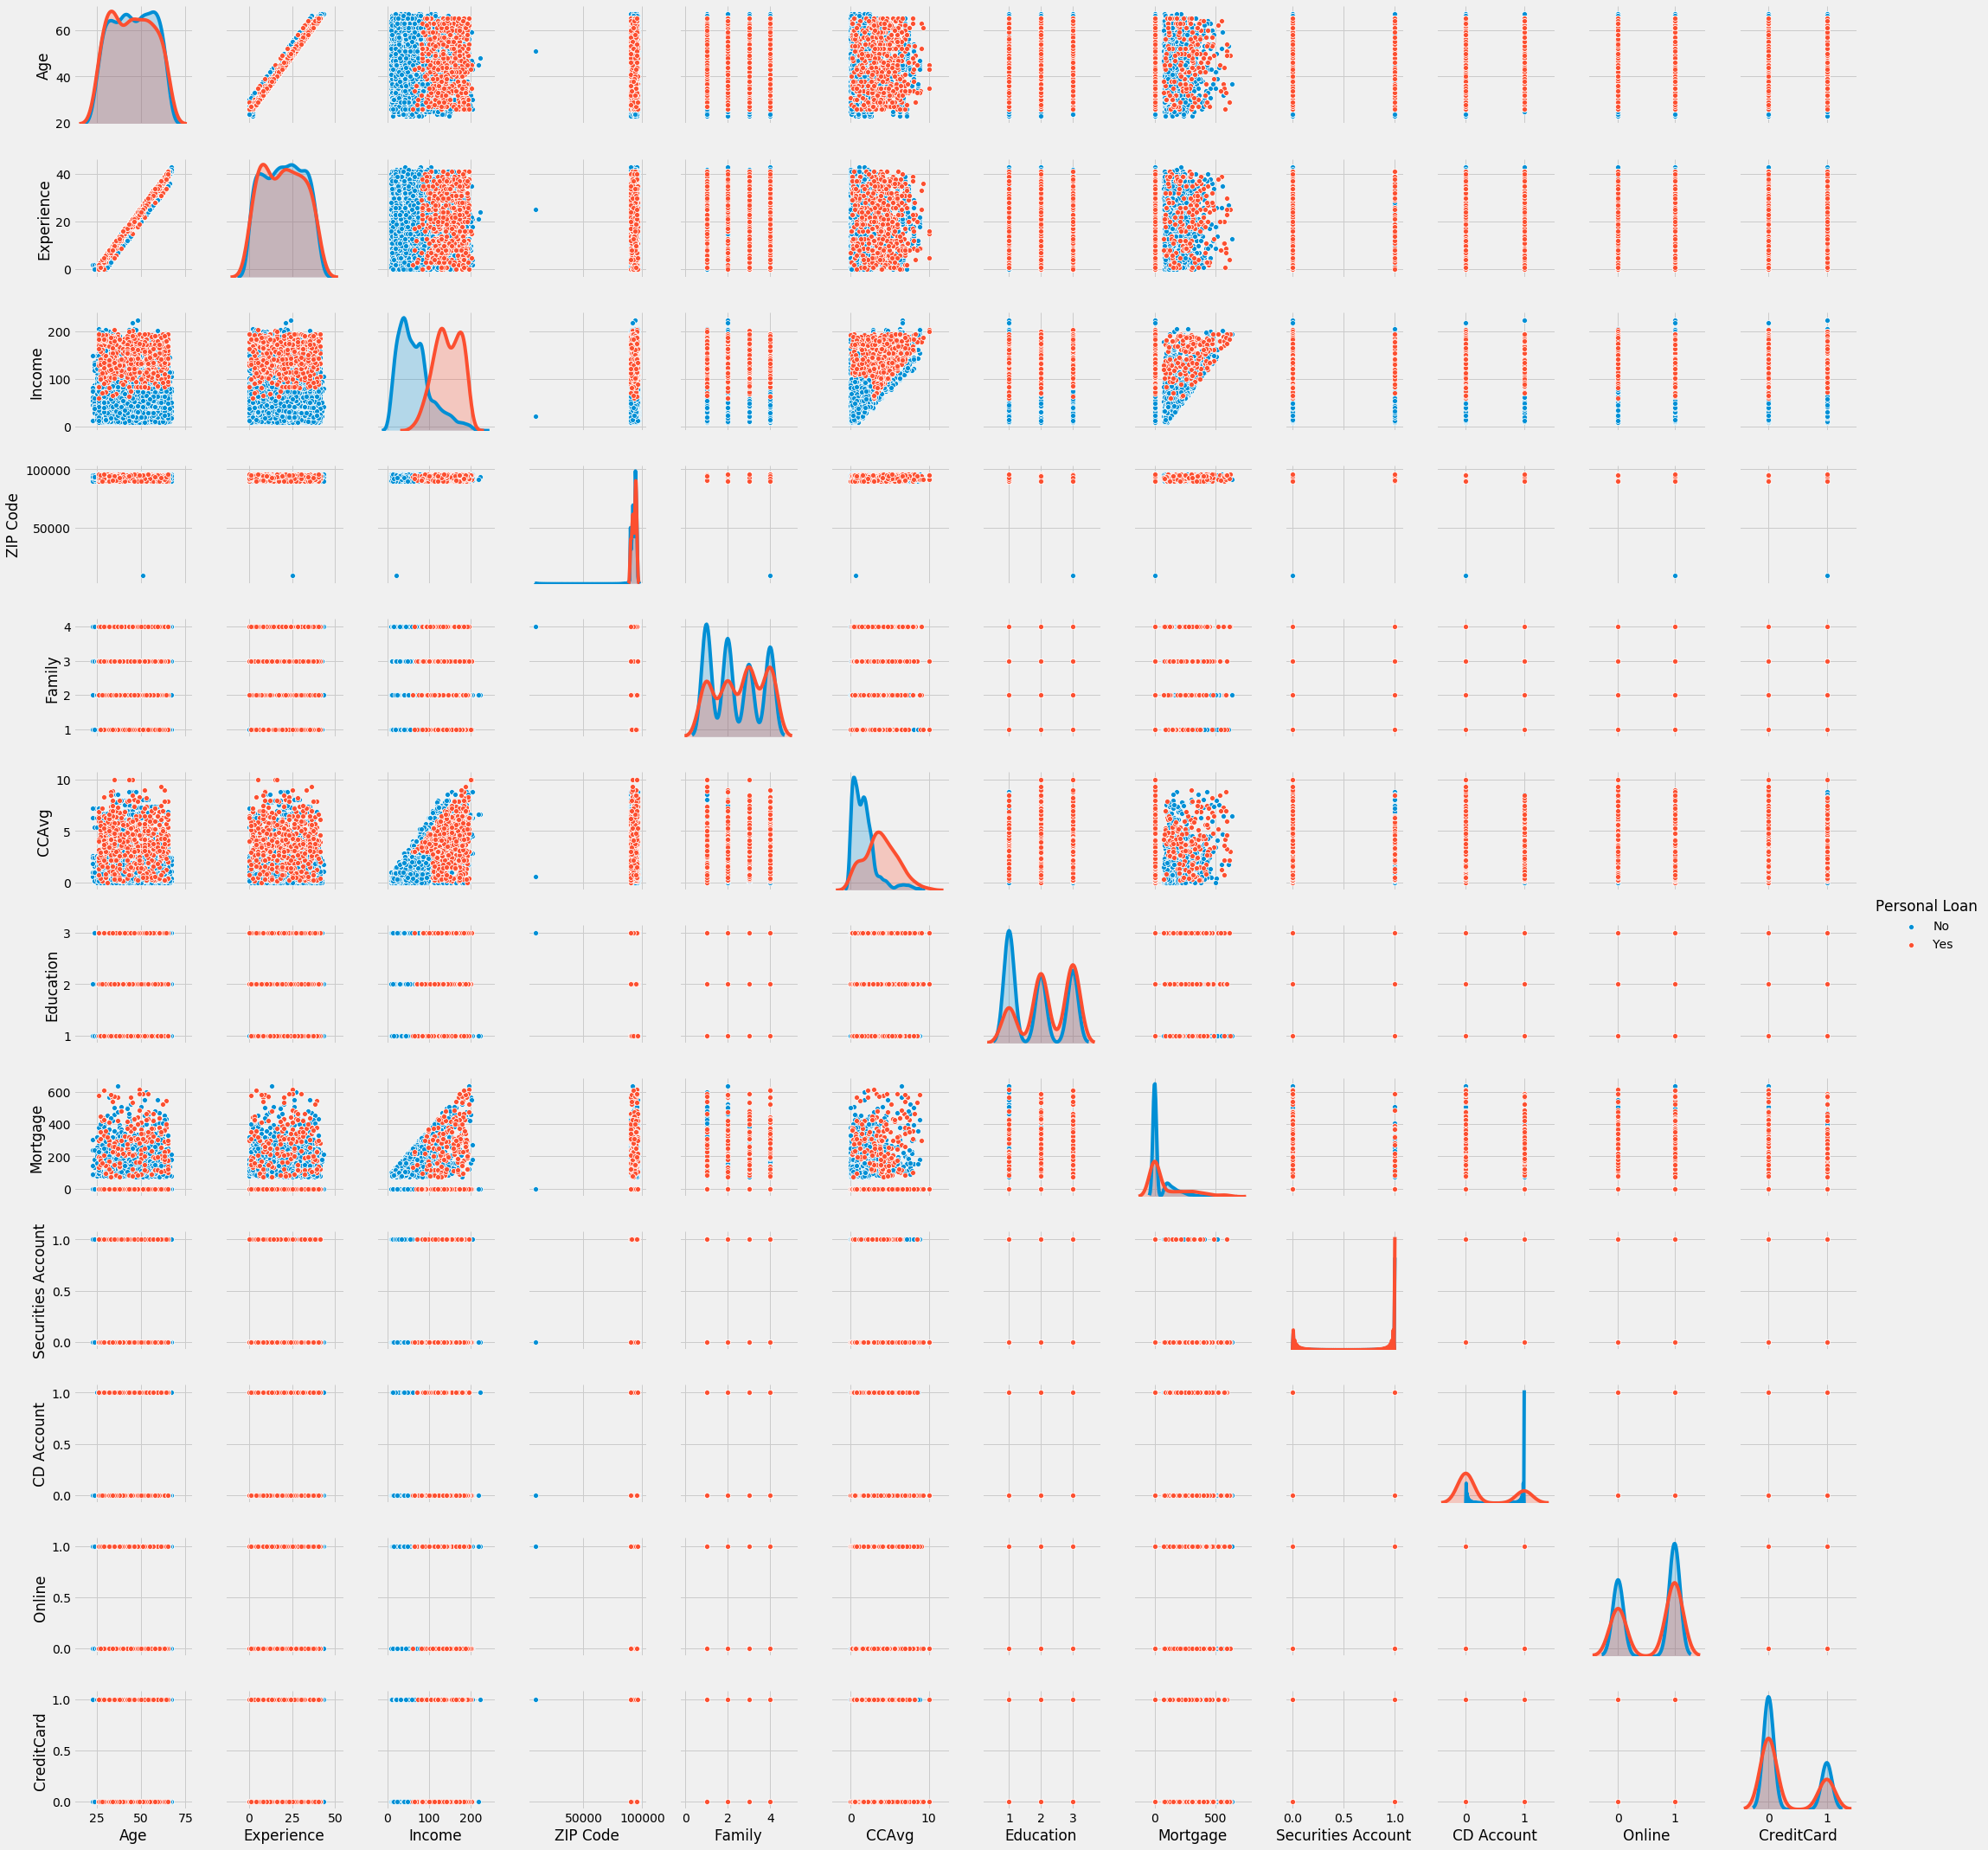

In [16]:
pairplt = bank.drop('ID', axis = 1)
pairplt['Personal Loan'] = pairplt['Personal Loan'].replace({0: 'No', 1: 'Yes'})
sns.pairplot(pairplt, hue = 'Personal Loan')

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
384,385,51,25.0,21,9307,4,0.6,3,0,0,0,0,1,1


Text(0.5, 1.0, 'Outlier in Zip Code')

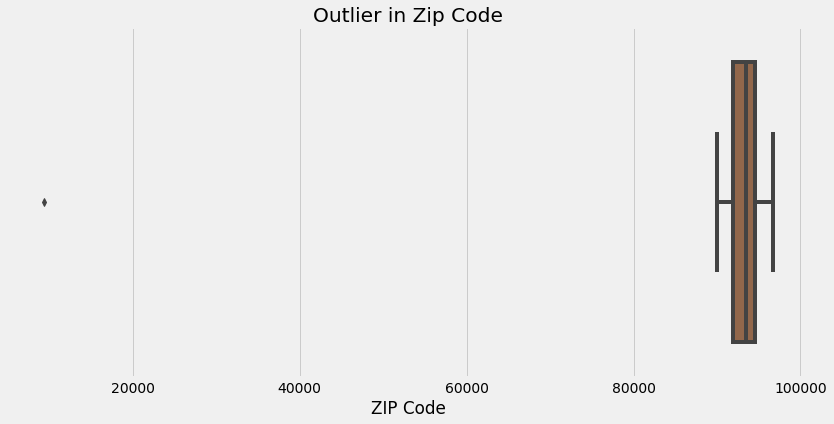

In [17]:
# Checking the outlier in ZIP Code
display(bank[bank['ZIP Code'] < 10000])
plt.figure(figsize = (12.8 , 6))
sns.boxplot(bank['ZIP Code'], palette = 'copper').set_title('Outlier in Zip Code')


In [18]:
#Since most of the ZIP Code are of 5 digits (possibly US), the above data point would be again be an error made while noting and it would seem logical to remove this particular row from the dataframe.
bank.drop(384, axis = 0, inplace = True)

Text(0.5, 1.0, 'Distribution of Income by Personal Loan')

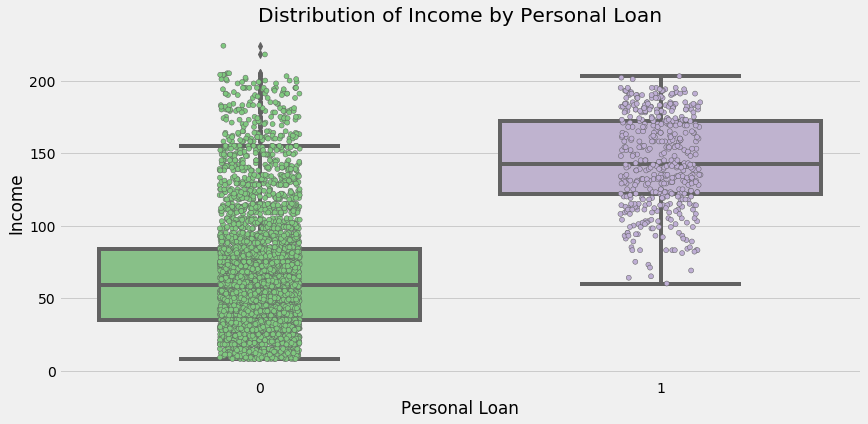

In [19]:
plt.figure(figsize = (12.8 , 6))
ax = sns.boxplot(x = 'Personal Loan', y = 'Income', palette = 'Accent', data = bank)
ax = sns.stripplot(x = 'Personal Loan', y = 'Income', palette = 'Accent', data = bank, 
              jitter = True, dodge = True, linewidth = 0.5)
ax.set_title('Distribution of Income by Personal Loan')

Text(0.5, 1.0, 'Distribution of Average Spending on Credit Card by Personal Loan')

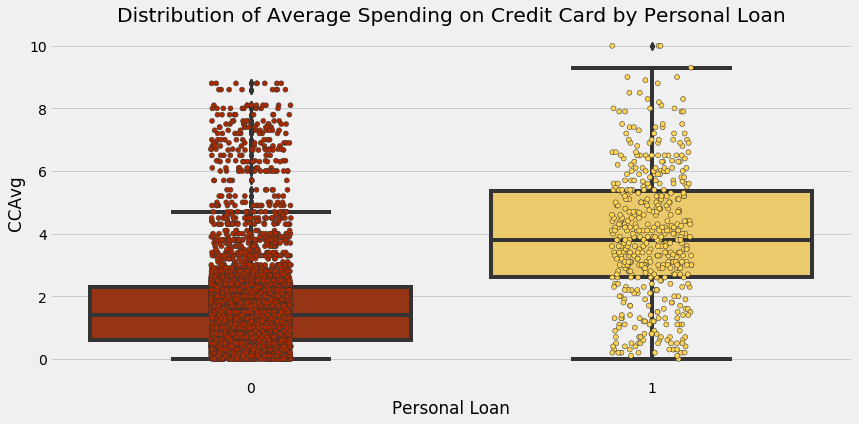

In [20]:
# Distribution of Average Spending on Credit Card by Personal Loan
plt.figure(figsize = (12.8 , 6))
ax = sns.boxplot(x = 'Personal Loan', y = 'CCAvg', palette = 'afmhot', data = bank)
ax = sns.stripplot(x = 'Personal Loan', y = 'CCAvg', palette = 'afmhot', data = bank, 
              jitter = True, dodge = True, linewidth = 0.5)
ax.set_title('Distribution of Average Spending on Credit Card by Personal Loan')

<Figure size 921.6x432 with 0 Axes>

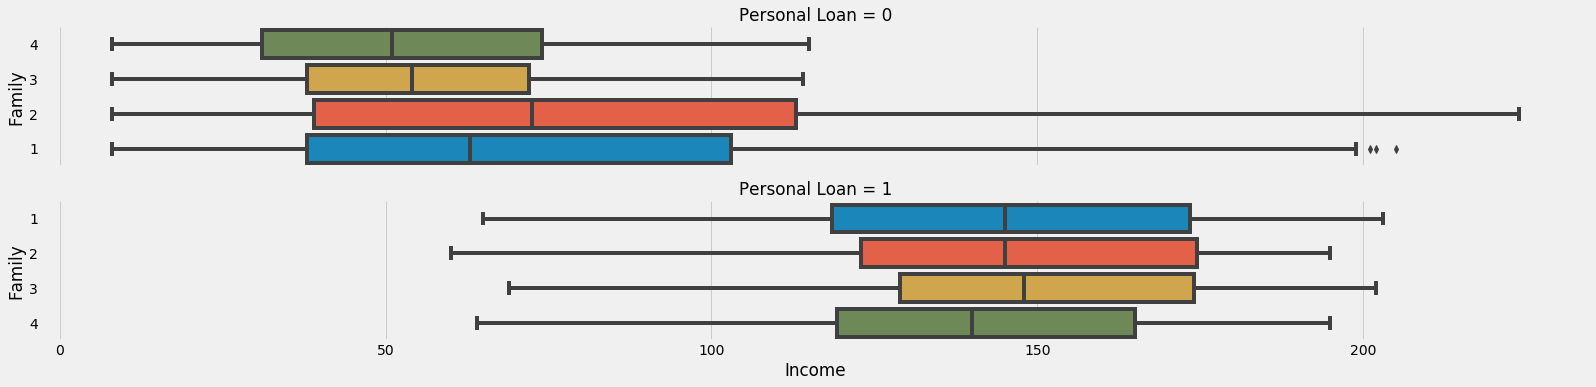

In [21]:
# Distribution of Family Size by Personal Loan and affect of Income
plt.figure(figsize = (12.8 , 6))
sns.catplot(x = 'Income', y = 'Family', row = 'Personal Loan', kind = 'box', orient = 'h', height = 2.8, aspect = 8, 
            data = bank)

<Figure size 921.6x432 with 0 Axes>

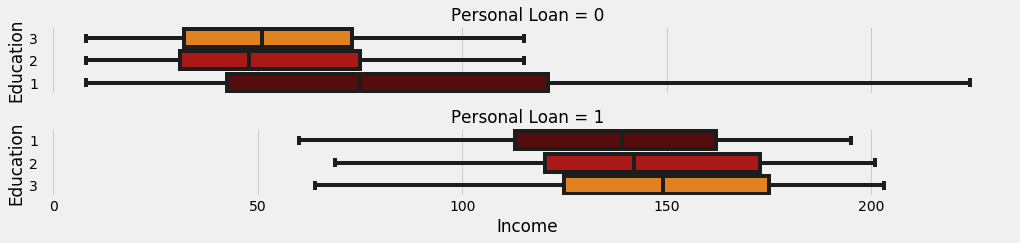

In [22]:
# Distribution of Education by Personal Loan and affect of Income
plt.figure(figsize = (12.8 , 6))
sns.catplot(x = 'Income', y = 'Education', row = 'Personal Loan', kind = 'box', orient = 'h', 
            height = 1.8, aspect = 8, palette = 'gist_heat', data = bank)

In [23]:
# Checking number of unique values for categorical columns
cat_cols = ['ZIP Code', 'Family', 'Education', 'Personal Loan', 'Securities Account', 'CD Account', 'Online', 'CreditCard']
bank[cat_cols].nunique()

ZIP Code              466
Family                  4
Education               3
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

In [24]:
#Removing ZIP Code from the analysis since it's a nominal variable and contains 466 unique values.
bank.drop(['ID', 'ZIP Code'], axis = 1, inplace = True)
bank.columns

Index(['Age', 'Experience', 'Income', 'Family', 'CCAvg', 'Education',
       'Mortgage', 'Personal Loan', 'Securities Account', 'CD Account',
       'Online', 'CreditCard'],
      dtype='object')

Text(0.5, 1, 'Correlation Matrix of Data')

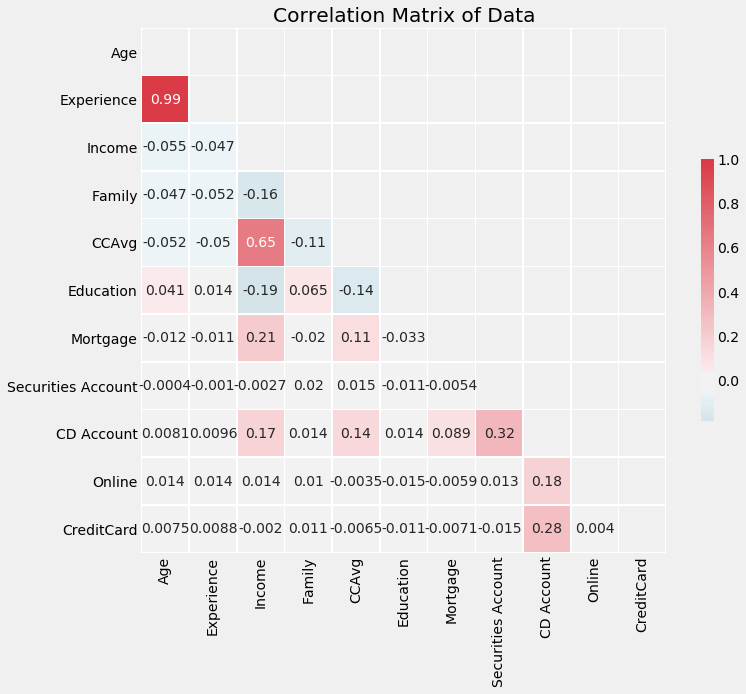

In [25]:
# Correlation matrix for all variables
corr = bank.drop('Personal Loan', axis = 1).corr()

mask = np.zeros_like(corr, dtype = np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize = (11, 9))

cmap = sns.diverging_palette(220, 10, as_cmap = True)

sns.heatmap(corr, mask = mask, cmap = cmap, vmax = 1, center = 0, square = True, 
            linewidths = .5, cbar_kws = {"shrink": .5}, annot = True)
ax.set_title('Correlation Matrix of Data')

# Building the Models

In [26]:
# dropping age column
bank.drop(['Age', 'Online', 'CreditCard'], axis = 1, inplace = True)
bank.columns

Index(['Experience', 'Income', 'Family', 'CCAvg', 'Education', 'Mortgage',
       'Personal Loan', 'Securities Account', 'CD Account'],
      dtype='object')

In [27]:
# Separating dependent and independent variables
X = bank.drop(['Personal Loan'], axis = 1)
y = bank['Personal Loan']

display(X.describe().T, X.shape, y.shape)

,count,mean,std,min,25%,50%,75%,max
Experience,4999.0,20.139428,11.406577,0.0,10.0,20.0,30.0,43.0
Income,4999.0,73.784757,46.032281,8.0,39.0,64.0,98.0,224.0
Family,4999.0,2.396079,1.147554,1.0,1.0,2.0,3.0,4.0
CCAvg,4999.0,1.938206,1.747731,0.0,0.7,1.5,2.5,10.0
Education,4999.0,1.880776,0.839804,1.0,1.0,2.0,3.0,3.0
Mortgage,4999.0,56.510102,101.720837,0.0,0.0,0.0,101.0,635.0
Securities Account,4999.0,0.104421,0.305836,0.0,0.0,0.0,0.0,1.0
CD Account,4999.0,0.060412,0.238273,0.0,0.0,0.0,0.0,1.0


(4999, 8)

(4999,)

# Logistic Regression

In [29]:
# Splitting the data into training and test set in the ratio of 70:30 respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3499, 8)

(1500, 8)

(3499,)

(1500,)

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression Scores without Hyperparameter Tuning


LR accuracy for train set: 0.950
LR accuracy for test set: 0.942

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      1354
           1       0.81      0.53      0.64       146

    accuracy                           0.94      1500
   macro avg       0.88      0.76      0.80      1500
weighted avg       0.94      0.94      0.94      1500


Confusion Matrix:
 [[1336   18]
 [  69   77]]

Accuracy Score:
 0.942


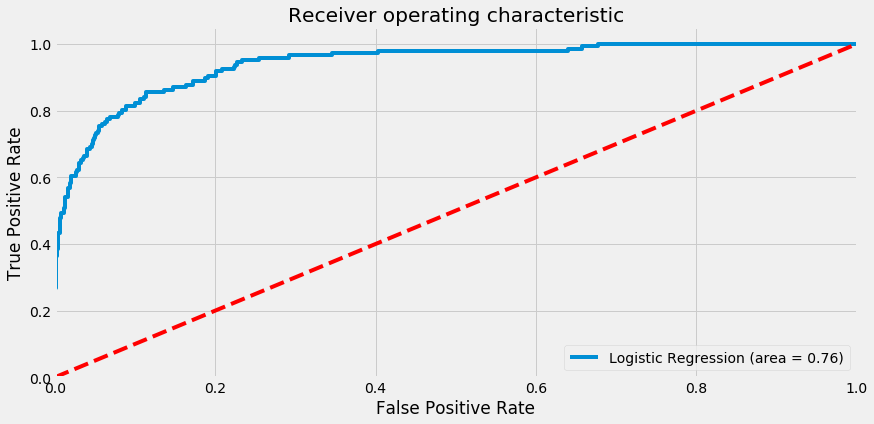

In [31]:
# LR model without hyperparameter tuning
LR = LogisticRegression()
LR.fit(X_train, y_train)

print('Logistic Regression Scores without Hyperparameter Tuning\n\n')
print('LR accuracy for train set: {0:.3f}'.format(LR.score(X_train, y_train)))
print('LR accuracy for test set: {0:.3f}'.format(LR.score(X_test, y_test)))

y_true, y_pred = y_test, LR.predict(X_test)

# Classification Report
print('\n{}'.format(classification_report(y_true, y_pred)))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print('\nConfusion Matrix:\n', cm)

# Accuracy Score
auc = accuracy_score(y_true, y_pred)
print('\nAccuracy Score:\n', auc.round(3))

# ROC Curve
LR_roc_auc = roc_auc_score(y_true, LR.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_true, LR.predict_proba(X_test)[:,1])
plt.figure(figsize = (12.8 , 6))
plt.plot(fpr, tpr, label = 'Logistic Regression (area = {})'.\
         format(LR_roc_auc.round(2)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = 'lower right')
plt.show()

C:\Users\Admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Logistic Regression Scores with Hyperparameter Tuning


Best Hyper Parameters are:  {'C': 10, 'max_iter': 100, 'penalty': 'l1'}
Best Score is:  0.951
LR accuracy for train set: 0.951
LR accuracy for test set: 0.940

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      1354
           1       0.77      0.55      0.64       146

    accuracy                           0.94      1500
   macro avg       0.86      0.77      0.80      1500
weighted avg       0.93      0.94      0.94      1500


Confusion Matrix:
 [[1330   24]
 [  66   80]]

Accuracy Score:
 0.94


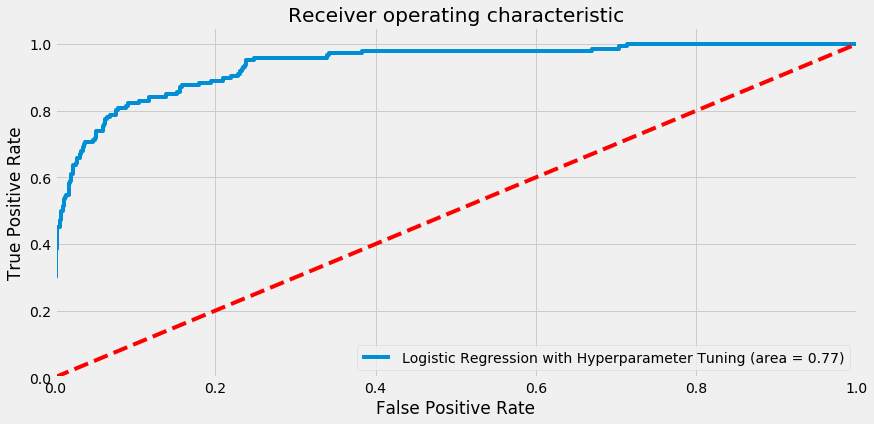

In [32]:
# LR with hyperparameter tuning
LR = LogisticRegression(random_state = 42)

params = {'penalty': ['l1', 'l2'], 'C': [0.001, 0.01, 0.1, 1, 10, 100], 'max_iter': [100, 110, 120, 130, 140]}

skf = StratifiedKFold(n_splits = 10)
LR_hyper = GridSearchCV(LR, param_grid = params, n_jobs = -1, cv = skf)

LR_hyper.fit(X_train, y_train)

print('Logistic Regression Scores with Hyperparameter Tuning\n\n')
print('Best Hyper Parameters are: ', LR_hyper.best_params_)
print('Best Score is: ', LR_hyper.best_score_.round(3))

print('LR accuracy for train set: {0:.3f}'.format(LR_hyper.score(X_train, y_train)))
print('LR accuracy for test set: {0:.3f}'.format(LR_hyper.score(X_test, y_test)))

y_true, y_pred = y_test, LR_hyper.predict(X_test)

# Classification Report
print('\n{}'.format(classification_report(y_true, y_pred)))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print('\nConfusion Matrix:\n', cm)

# Accuracy Score
auc = accuracy_score(y_true, y_pred)
print('\nAccuracy Score:\n', auc.round(3))
# ROC Curve
LR_hyper_roc_auc = roc_auc_score(y_true, LR_hyper.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_true, LR_hyper.predict_proba(X_test)[:,1])
plt.figure(figsize = (12.8 , 6))
plt.plot(fpr, tpr, label = 'Logistic Regression with Hyperparameter Tuning (area = {})'.\
         format(LR_hyper_roc_auc.round(2)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = 'lower right')
plt.show()

# k-Nearest Neighbor Classifier

In [33]:
# Splitting the data into training and test set in the ratio of 70:30 respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
display(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(3499, 8)

(1500, 8)

(3499,)

(1500,)

k-Nearest Neighbor Classifier Scores without feature scaling


k-NN accuracy for train set: 0.941
k-NN accuracy for test set: 0.907

              precision    recall  f1-score   support

           0       0.93      0.97      0.95      1354
           1       0.54      0.30      0.39       146

    accuracy                           0.91      1500
   macro avg       0.74      0.64      0.67      1500
weighted avg       0.89      0.91      0.90      1500


Confusion Matrix:
 [[1317   37]
 [ 102   44]]

Accuracy Score:
 0.907


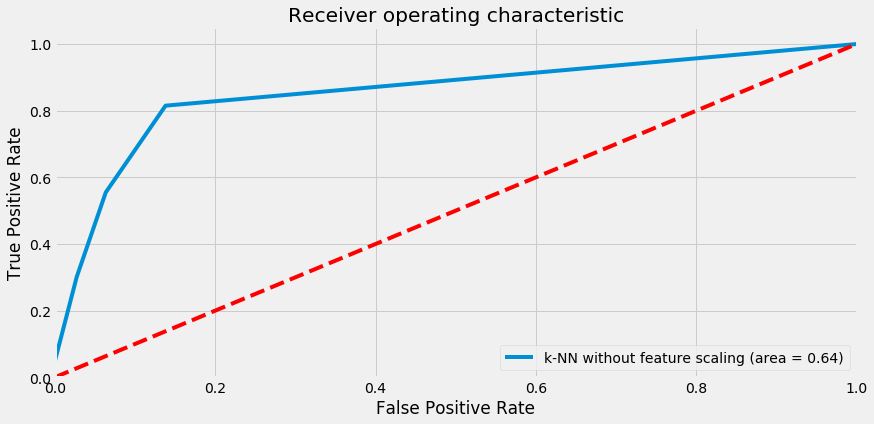

In [34]:
# KNN Model without scaling the features
KNN = KNeighborsClassifier()
KNN.fit(X_train, y_train)

print('k-Nearest Neighbor Classifier Scores without feature scaling\n\n')
print('k-NN accuracy for train set: {0:.3f}'.format(KNN.score(X_train, y_train)))
print('k-NN accuracy for test set: {0:.3f}'.format(KNN.score(X_test, y_test)))

y_true, y_pred = y_test, KNN.predict(X_test)

# Classification Report
print('\n{}'.format(classification_report(y_true, y_pred)))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print('\nConfusion Matrix:\n', cm)

# Accuracy Score
auc = accuracy_score(y_true, y_pred)
print('\nAccuracy Score:\n', auc.round(3))
# ROC Curve
KNN_roc_auc = roc_auc_score(y_true, KNN.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_true, KNN.predict_proba(X_test)[:,1])
plt.figure(figsize = (12.8 , 6))
plt.plot(fpr, tpr, label = 'k-NN without feature scaling (area = {})'.\
         format(KNN_roc_auc.round(2)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = 'lower right')
plt.show()

k-Nearest Neighbor Classifier Scores after Hyperparameter Tuning


Best Hyper Parameters are:  {'algorithm': 'auto', 'n_neighbors': 19, 'weights': 'distance'}

Best Score is:  0.916
k-NN accuracy for train set: 1.000
k-NN accuracy for test set: 0.916

              precision    recall  f1-score   support

           0       0.92      0.99      0.96      1354
           1       0.70      0.24      0.36       146

    accuracy                           0.92      1500
   macro avg       0.81      0.61      0.66      1500
weighted avg       0.90      0.92      0.90      1500


Confusion Matrix:
 [[1339   15]
 [ 111   35]]

Accuracy Score:
 0.916


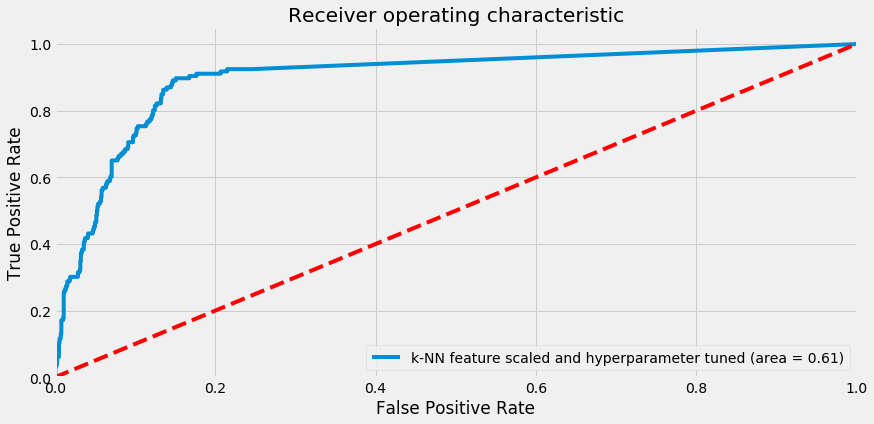

In [35]:
# KNN with hyperparameter tuning
KNN = KNeighborsClassifier(n_jobs = -1)

params = {'n_neighbors': list(range(1, 40, 2)), 'weights': ['uniform', 'distance'],
          'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']}

skf = StratifiedKFold(n_splits = 10, random_state = 42)
KNN_hyper = GridSearchCV(KNN, param_grid = params, n_jobs = -1, cv = skf)

KNN_hyper.fit(X_train, y_train)

print('k-Nearest Neighbor Classifier Scores after Hyperparameter Tuning\n\n')
print('Best Hyper Parameters are: ', KNN_hyper.best_params_)
print('\nBest Score is: ', KNN_hyper.best_score_.round(3))

print('k-NN accuracy for train set: {0:.3f}'.format(KNN_hyper.score(X_train, y_train)))
print('k-NN accuracy for test set: {0:.3f}'.format(KNN_hyper.score(X_test, y_test)))

y_true, y_pred = y_test, KNN_hyper.predict(X_test)

# Classification Report
print('\n{}'.format(classification_report(y_true, y_pred)))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print('\nConfusion Matrix:\n', cm)

# Accuracy Score
auc = accuracy_score(y_true, y_pred)
print('\nAccuracy Score:\n', auc.round(3))

# ROC Curve
KNN_hyper_roc_auc = roc_auc_score(y_true, KNN_hyper.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_true, KNN_hyper.predict_proba(X_test)[:,1])
plt.figure(figsize = (12.8 , 6))
plt.plot(fpr, tpr, label = 'k-NN feature scaled and hyperparameter tuned (area = {})'.\
         format(KNN_hyper_roc_auc.round(2)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = 'lower right')
plt.show()


# Naive Bayes classifier

Naive Bayes Classifier Scores


NB accuracy for train set: 0.883
NB accuracy for test set: 0.893

              precision    recall  f1-score   support

           0       0.95      0.93      0.94      1354
           1       0.46      0.59      0.52       146

    accuracy                           0.89      1500
   macro avg       0.71      0.76      0.73      1500
weighted avg       0.91      0.89      0.90      1500


Confusion Matrix:
 [[1253  101]
 [  60   86]]

Accuracy Score:
 0.893


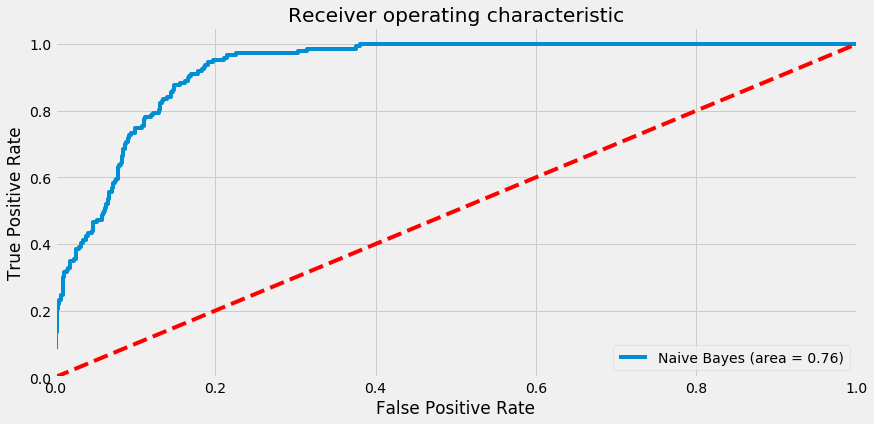

In [36]:
# Naive Bayes Model
NB = GaussianNB()
NB.fit(X_train, y_train)

print('Naive Bayes Classifier Scores\n\n')
print('NB accuracy for train set: {0:.3f}'.format(NB.score(X_train, y_train)))
print('NB accuracy for test set: {0:.3f}'.format(NB.score(X_test, y_test)))

y_true, y_pred = y_test, NB.predict(X_test)

# Classification Report
print('\n{}'.format(classification_report(y_true, y_pred)))

# Confusion Matrix
cm = confusion_matrix(y_true, y_pred)
print('\nConfusion Matrix:\n', cm)

# Accuracy Score
auc = accuracy_score(y_true, y_pred)
print('\nAccuracy Score:\n', auc.round(3))

# ROC Curve
NB_roc_auc = roc_auc_score(y_true, NB.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_true, NB.predict_proba(X_test)[:,1])
plt.figure(figsize = (12.8 , 6))
plt.plot(fpr, tpr, label = 'Naive Bayes (area = {})'.\
         format(NB_roc_auc.round(2)))
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc = 'lower right')
plt.show()
